In [17]:
import numpy.matlib
import numpy as np
import pandas as pd

# Numpy矩阵库

## eye()

In [50]:
# 4*5，对角线为1的矩阵
fiveByfiveMatrix = np.matlib.eye(4,5,0, dtype=np.int32)
print(fiveByfiveMatrix)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]


## ones()

In [49]:
onesMatrix = np.matlib.ones((2,2), dtype=np.int32)
print(onesMatrix)

[[1 1]
 [1 1]]


## zeros()

In [53]:
zerosMatrix = np.matlib.zeros((3,2), dtype=np.int16)
print(zerosMatrix)

[[0 0]
 [0 0]
 [0 0]]


## identity()

In [42]:
# 5*5，单位矩阵
IdentityMatrix = np.matlib.identity(5,dtype=np.float32)
IdentityMatrix

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], dtype=float32)

# 绘制散点图

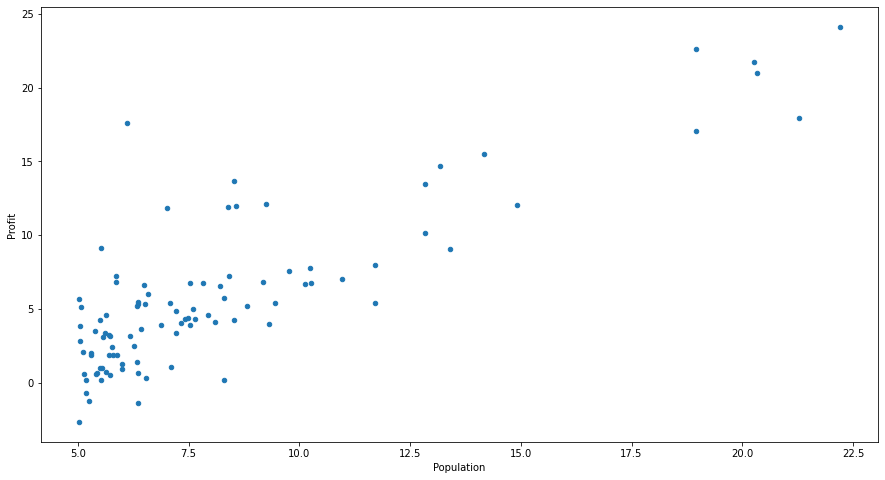

In [113]:
# 读取文件，默认以第一行数据作为表头，故需要指定 names
demo = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])

# 数据集前几条
# data.head()

# 数据详情
#data.describe()

# api文档：https://www.gairuo.com/p/pandas-tutorial
# x y 的值要和 names 一样
df = demo.plot.scatter(x='Population', y='Profit', figsize=(15,8))

# Gradient Descent

## Cost Function

以参数 θ 为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

## Hypothesis Function
\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

# 单变量线性回归

In [148]:
"""
实现代价函数

:param X     训练集中 x0 和 x1-Population 的所有值
:param y     训练集中 'y-Profit 的所有值
:param theta 特征变量，初始值为 [0 ,0]
"""
def computerCost(X, y, theta):
    
    inner = X @ theta - y        # X @ theta 表叉乘
    square_sum = inner.T @ inner # 求平方和

    return square_sum / (2 * len(X))  # len(X) 等于样本数 m

In [149]:
data = pd.read_csv('ex1data1.txt', names=['x1-Population', 'y-Profit'])

# 训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。
# data.insert() 第1个参数：位置，第2个参数：列名，第3个参数：值
data.insert(0,'x0',1)  # x0 设为 1
data.head()

,x0,x1-Population,y-Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [150]:
cols = data.shape[1]          # data.shape = (97, 3)
X = data.iloc[:, 0:cols-1]    # data.iloc[行:行,列:列]。此处为：取出所有行，并去掉最后一列
y = data.iloc[:, -1]          # 取出最后一列
theta = np.zeros(X.shape[1])  # 特征变量 theta 的个数为 X.shape[1]

# 看下维度
X.shape, theta.shape, y.shape

((97, 2), (2,), (97,))

In [151]:
# 计算代价函数
computerCost(X, y, theta)

6222.1103722264


32.07273387745567

# Batch Gradient Decent

批量梯度下降，更新方程:

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [ ]:
"""
迭代训练所有样本

:param X     训练集中 x0 和 x1-Population 的所有值
:param y     训练集中 'y-Profit 的所有值
:param theta 维度 1*2 的 matrix
:param alpha 学习率
:param iters 迭代次数

"""
def batchGradientDescent(X, y, theta, iters, alpha=0.01):
    
    # 初始化
    tmp = np.matrix( np.zeros(theta.shape) ) # theta 初始化值为 0
    parameters = int(  theta.shape[1] )      # theta 的列数表示参数的个数
    cost = np.zeros(iters)                   # cost 初始化值为 iters 个 0
    
    # 迭代次数
    for i in range(iters):
        error = ( X * theta.T ) - y
        
        for j in range(parameters):
            term = np.multiply( error, X[:, j])
            temp[0,j] = theta[0,j] - 